# Importing the Relevant Libraries

In [1]:
#Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from pandas.plotting import scatter_matrix
from sklearn.utils.validation import check_X_y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, TargetEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, mean_squared_error, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek

# Loading the Dataset to be used & examining the raw data 

In [2]:
# Load the dataset
file_path = "Spotify Data.csv"
sdata = pd.read_csv(file_path)

# Count missing values in each column
missing_values = sdata.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

# Display the first few rows of the dataset
df_head = sdata.head()
df_info = sdata.info()

df_head, df_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

(                 track_id                 artists  \
 0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
 1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
 2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
 3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
 4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration_ms  explicit  \
 0                      Comedy          73       230666     False   
 1            Ghost - Acoustic          55       149610     False   
 2              To Begin Again          57       210826     False   
 3  Can't Help Falling In Love          71       20193

# Examining Unique Values in non-numerical columns

In [3]:
# Selecting non-numeric columns
non_numeric_columns = sdata.select_dtypes(exclude=['number', 'bool']).columns

# Count unique values for each non-numeric column
for col in non_numeric_columns:
    unique_count = sdata[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.\n")
    
    # Display top unique values for insight
    print(sdata[col].value_counts().head(10), "\n" + "-"*50 + "\n")


Column 'track_id' has 89741 unique values.

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
7tbzfR8ZvZzJEzy6v0d6el    7
0YLSjVxSb5FT1Bo8Tnxr8j    7
4WJTKbNJQ41zXnb84jSWaj    7
2aaClnypAakdAmLw74JXxB    7
2vU6bm5hVF2idVknGzqyPL    7
Name: count, dtype: int64 
--------------------------------------------------

Column 'artists' has 31437 unique values.

artists
The Beatles          279
George Jones         271
Stevie Wonder        236
Linkin Park          224
Ella Fitzgerald      222
Prateek Kuhad        217
Feid                 202
Chuck Berry          190
HÃ¥kan HellstrÃ¶m    183
OneRepublic          181
Name: count, dtype: int64 
--------------------------------------------------

Column 'album_name' has 46579 unique values.

album_name
Alternative Christmas 2022      195
Feliz CumpleaÃ±os con Perreo    184
Metal                           143
Halloween con perreito          123
Hallowe

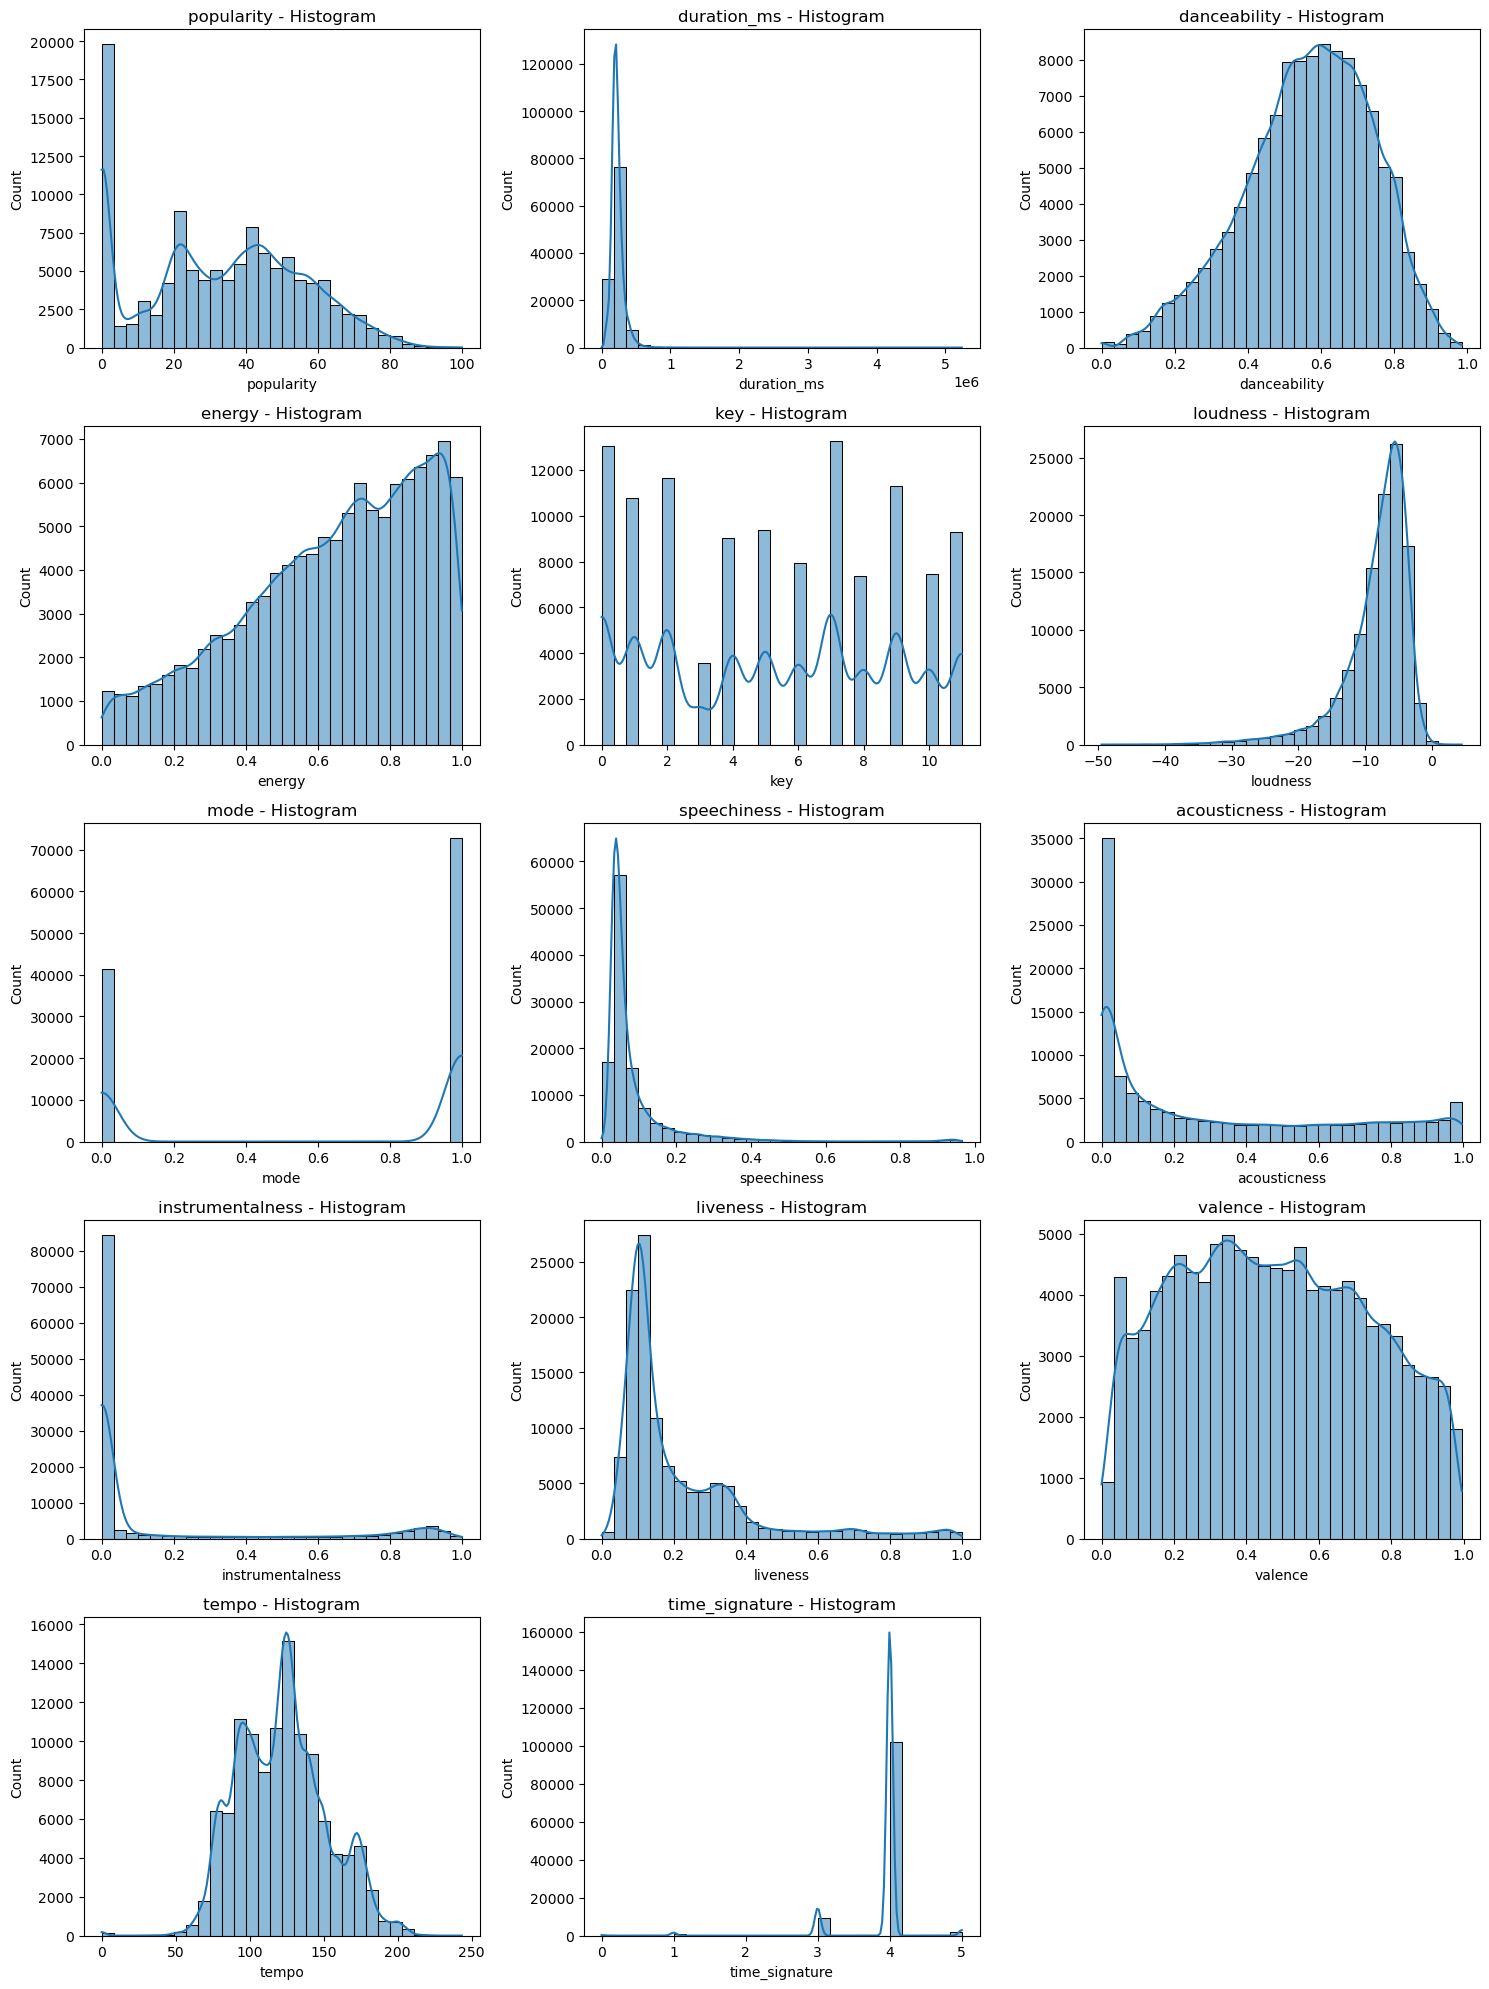

In [4]:
# Select numeric columns
num_features = sdata.select_dtypes(include='number').columns.tolist()
sdata['popularity_bin'] = pd.cut(sdata['popularity'], bins=[0, 20, 50, 80, 100],
                       labels=["0–20", "21–50", "51–80", "81–100"])

# === HISTOGRAMS ===
n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axs = axs.flatten()

for i, feature in enumerate(num_features):
    sns.histplot(sdata[feature], ax=axs[i], kde=True, bins=30)
    axs[i].set_title(f'{feature} - Histogram')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

C:\Users\MIran\AppData\Local\Temp\ipykernel_35612\761659964.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=sdata, x='explicit', y='popularity', ci='sd')


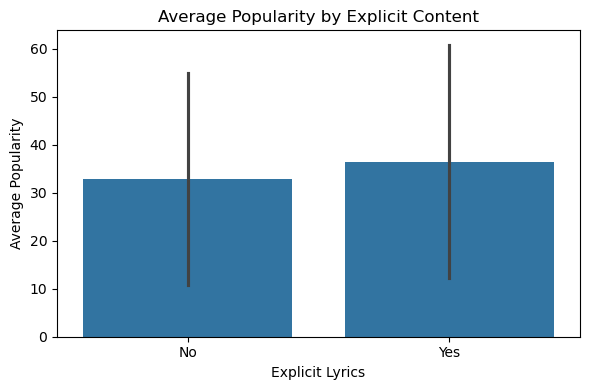

In [5]:
# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=sdata, x='explicit', y='popularity', ci='sd')

plt.title('Average Popularity by Explicit Content')
plt.xlabel('Explicit Lyrics')
plt.ylabel('Average Popularity')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

# Cleaning the raw data steps

In [6]:
# 1. Standardizing simple text columns, not names (strip spaces, lowercase)
sdata['track_genre'] = sdata['track_genre'].str.strip().str.lower()

#2. Convert popularity to binary labels (1 = Popular, 0 = Not Popular) >75 is popular we are keeping the top 25% of popularity scores 
sdata["popularity_label"] = (sdata["popularity"] > 75).astype(int)

#3 Handle missing values (drop rows with missing artist, album_name, or track_name)
sdata = sdata.dropna()

#4. Normalize loudness (since it's in negative decibels)
sdata["loudness"] = (sdata["loudness"] - sdata["loudness"].min()) / (sdata["loudness"].max() - sdata["loudness"].min())

#5. Normalize tempo
sdata["tempo"] = (sdata["tempo"] - sdata["tempo"].min()) / (sdata["tempo"].max() - sdata["tempo"].min())

#6. Drop track_id
sdata = sdata.drop(columns=["track_id"])  

#7. drop the zero values for popularity
sdata = sdata[sdata['popularity'] != 0]

# 8. Normalize duration
# Converting duration_ms to durations which is minutes & seconds for clarity
sdata["duration"] = sdata["duration_ms"] / 60000  # convert ms to minutes

#9. Remove duplicates
sdata = sdata.drop_duplicates()

# 10. Drop original text columns after encoding
sdata_clean = sdata.drop(columns=['artists', 'album_name', 'track_name',
              'popularity_bin', 'track_genre', 'duration_ms', 'time_signature'])
# Keeping original 'popularity' for examination of distribution and feature importance

#11. Confirm dataset cleanup
print(sdata_clean.info())
print(sdata_clean.head())
print("Columns in sdata_clean:\n", sdata_clean.columns)



<class 'pandas.core.frame.DataFrame'>
Index: 97696 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        97696 non-null  int64  
 1   explicit          97696 non-null  bool   
 2   danceability      97696 non-null  float64
 3   energy            97696 non-null  float64
 4   key               97696 non-null  int64  
 5   loudness          97696 non-null  float64
 6   mode              97696 non-null  int64  
 7   speechiness       97696 non-null  float64
 8   acousticness      97696 non-null  float64
 9   instrumentalness  97696 non-null  float64
 10  liveness          97696 non-null  float64
 11  valence           97696 non-null  float64
 12  tempo             97696 non-null  float64
 13  popularity_label  97696 non-null  int32  
 14  duration          97696 non-null  float64
dtypes: bool(1), float64(10), int32(1), int64(3)
memory usage: 10.9 MB
None
   popularity  expli

In [20]:
sdata_clean.to_csv("cleaned_songs.csv", index=False)
print("✅ Cleaned dataset saved to cleaned_songs.csv")


✅ Cleaned dataset saved to cleaned_songs.csv


# Ensuring the normalization was successful

In [7]:
# Features to analyze 
features = ["danceability", "energy", "valence", "loudness", "acousticness", "tempo", "duration"]

# Finding Min and Max for each feature
high_low_values = {}
for feature in features:
    high_low_values[feature] = {
        "Minimum": sdata_clean[feature].min(),
        "Maximum": sdata_clean[feature].max()
    }

# Convert to DataFrame for better readability
high_low_df = pd.DataFrame(high_low_values)

# Display the results
print(high_low_df)


         danceability  energy  valence  loudness  acousticness  tempo  \
Minimum         0.000     0.0    0.000       0.0         0.000    0.0   
Maximum         0.985     1.0    0.995       1.0         0.996    1.0   

          duration  
Minimum   0.404433  
Maximum  87.288250  


# Examine distribution of Target Variable 

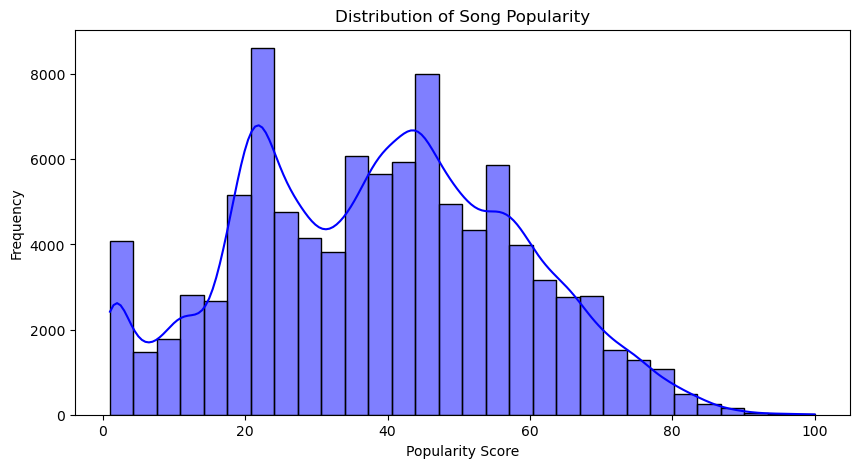

In [8]:
# Plot distribution of popularity scores to show how many are 
plt.figure(figsize=(10, 5))
sns.histplot(sdata_clean["popularity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

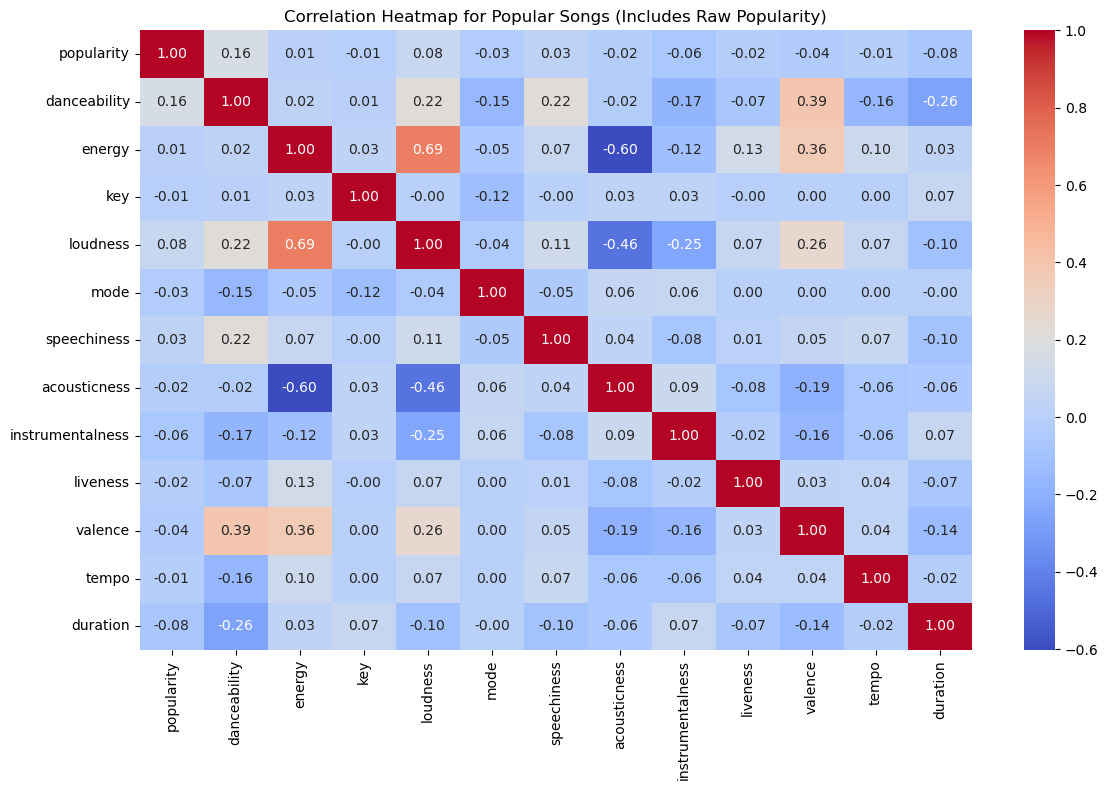

In [9]:
# Filter to only popular songs
popular_songs = sdata_clean[sdata_clean['popularity_label'] == 1]

# Select only numeric features
numeric_df = popular_songs.select_dtypes(include=np.number)

# Drop only the binary label column, keep raw popularity
numeric_df = numeric_df.drop(columns=["popularity_label"])

# Compute and plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for Popular Songs (Includes Raw Popularity)")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


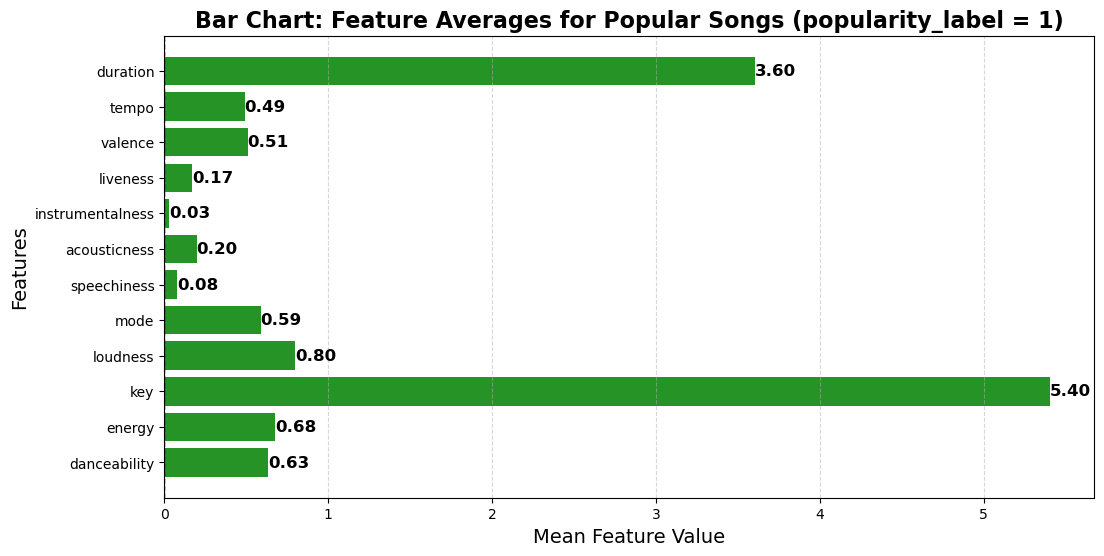

In [10]:
# Selecting numerical features for visualization
numerical_features = ['danceability', 'energy', 'key','loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration' ]

# Filter for high popularity based on binary label
high_pop_df = sdata_clean[sdata_clean["popularity_label"] == 1]

# Compute mean of each numerical feature
diverging_data = high_pop_df[numerical_features].mean()

# Define color mapping (green for positive, red for negative deviation from 0)
colors = ['green' if value >= 0 else 'red' for value in diverging_data]

# Create a diverging bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(diverging_data.index, diverging_data.values, color=colors, alpha=0.85)

# Add annotations
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='left' if bar.get_width() > 0 else 'right',
             fontsize=12, fontweight='bold')

# Styling
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Mean Feature Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Bar Chart: Feature Averages for Popular Songs (popularity_label = 1)", fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [11]:
#compute numerical stats and print as a chart
numerical_stats = sdata_clean[numerical_features].describe().round(2)
#Display
numerical_stats

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,97696.00,97696.00,97696.00,97696.00,97696.00,97696.00,97696.00,97696.00,97696.00,97696.00,97696.00,97696.00
mean,0.57,0.65,5.31,0.76,0.63,0.09,0.31,0.16,0.22,0.47,0.50,3.84
std,0.17,0.25,3.55,0.09,0.48,0.11,0.33,0.32,0.20,0.26,0.12,1.83
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40
25%,0.46,0.48,2.00,0.73,0.00,0.04,0.01,0.00,0.10,0.26,0.41,2.93
50%,0.58,0.69,5.00,0.79,1.00,0.05,0.17,0.00,0.13,0.46,0.50,3.59
75%,0.69,0.86,8.00,0.82,1.00,0.09,0.59,0.07,0.28,0.68,0.58,4.42
max,0.98,1.00,11.00,1.00,1.00,0.96,1.00,1.00,1.00,1.00,1.00,87.29


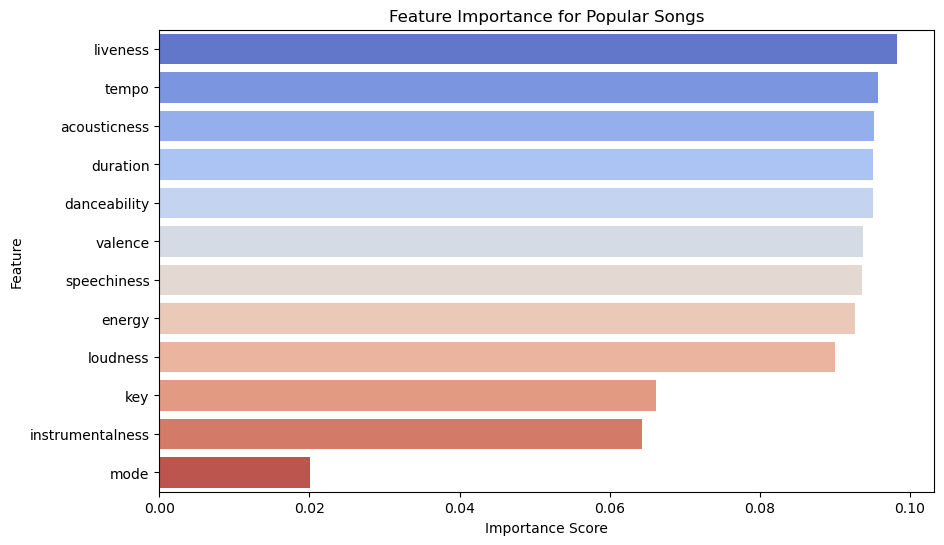

In [12]:
# Ensure numerical_features is a list of valid column names
if not isinstance(numerical_features, list):
    raise TypeError("numerical_features should be a list of column names.")

# Filter to only popular songs
popular_data = sdata_clean[sdata_clean['popularity'] > 75]

# Extract selected numerical columns from DataFrame
X_popular = popular_data[numerical_features]
X_popular = X_popular.select_dtypes(include=[np.number])
X_popular = X_popular.fillna(X_popular.mean())

# Target: raw popularity score (not the binary label)
y_popular = popular_data['popularity']

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_popular, y_popular)

# Feature importance
importance_df = pd.DataFrame({
    'Feature': X_popular.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', y='Feature', data=importance_df,
    hue='Feature', dodge=False, legend=False, palette='coolwarm'
)
plt.title('Feature Importance for Popular Songs')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



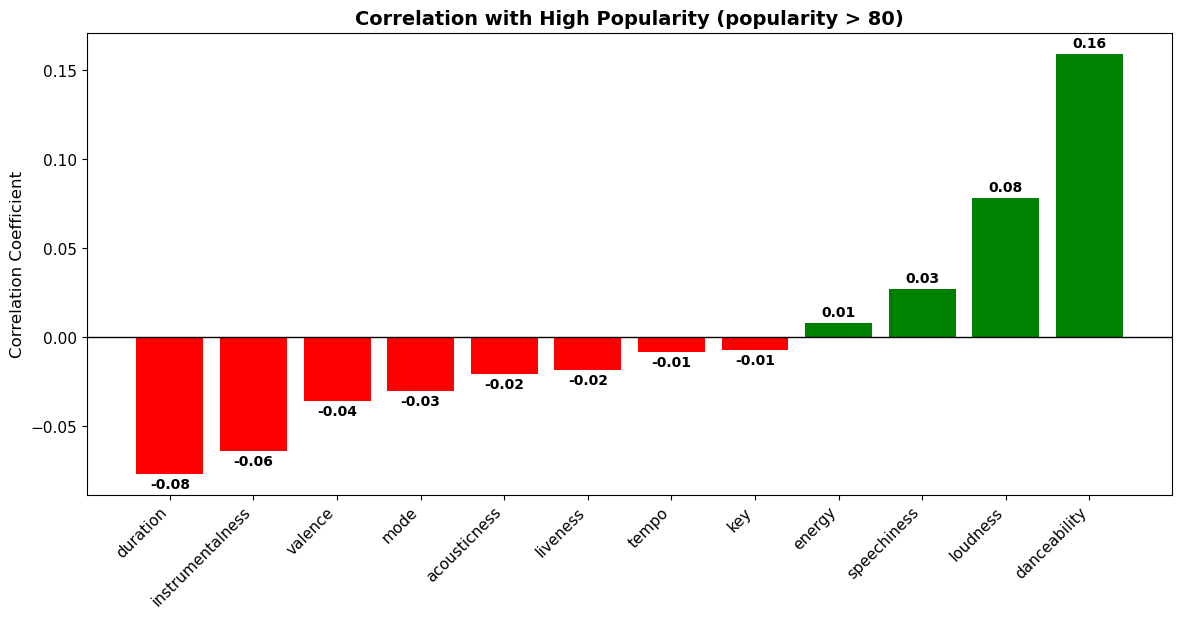

In [13]:
# Only numeric data
numeric_corr = popular_data.select_dtypes(include=[np.number]).corr()

# Correlation with popularity (excluding itself and label)
corr_with_pop = numeric_corr['popularity'].drop(['popularity', 'popularity_label'], errors='ignore')

# Sort correlations
corr_sorted = corr_with_pop.sort_values()

# Bar colors
colors = ['green' if val > 0 else 'red' for val in corr_sorted]

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(corr_sorted.index, corr_sorted.values, color=colors)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 0.002 if height > 0 else height - 0.002,
             f'{height:.2f}',
             ha='center', va='bottom' if height > 0 else 'top',
             fontsize=10, fontweight='bold')

plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.title('Correlation with High Popularity (popularity > 80)', fontsize=14, fontweight='bold')
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.show()


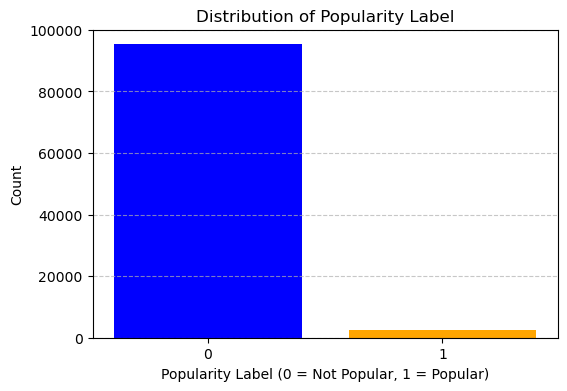

In [14]:
# Examine the distribution of popularity_label
if 'popularity_label' in sdata_clean.columns:
    # Count occurrences of each category (0 and 1)
    popularity_counts = sdata_clean['popularity_label'].value_counts()

    # Create bar plot
    plt.figure(figsize=(6, 4))
    plt.bar(popularity_counts.index.astype(str), popularity_counts.values, color=['blue', 'orange'])
    plt.xlabel("Popularity Label (0 = Not Popular, 1 = Popular)")
    plt.ylabel("Count")
    plt.title("Distribution of Popularity Label")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'popularity_label' not found in the dataset. Please ensure it exists.")

In [15]:
# Count the number of popular songs (popularity_label == 1)
popular_count = sdata_clean[sdata_clean["popularity_label"] == 1].shape[0]
unpopular_count = sdata_clean[sdata_clean["popularity_label"] == 0].shape[0]
print(f"Number of popular songs (popularity_label == 1): {popular_count}")
print(f"Number of unpopular songs (popularity_label == 0): {unpopular_count}")

Number of popular songs (popularity_label == 1): 2412
Number of unpopular songs (popularity_label == 0): 95284


C:\Users\MIran\anaconda3-2\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\MIran\anaconda3-2\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\MIran\anaconda3-2\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\MIran\anaconda3-2\Lib\site-packages\xgboost\training.py:183: UserWa

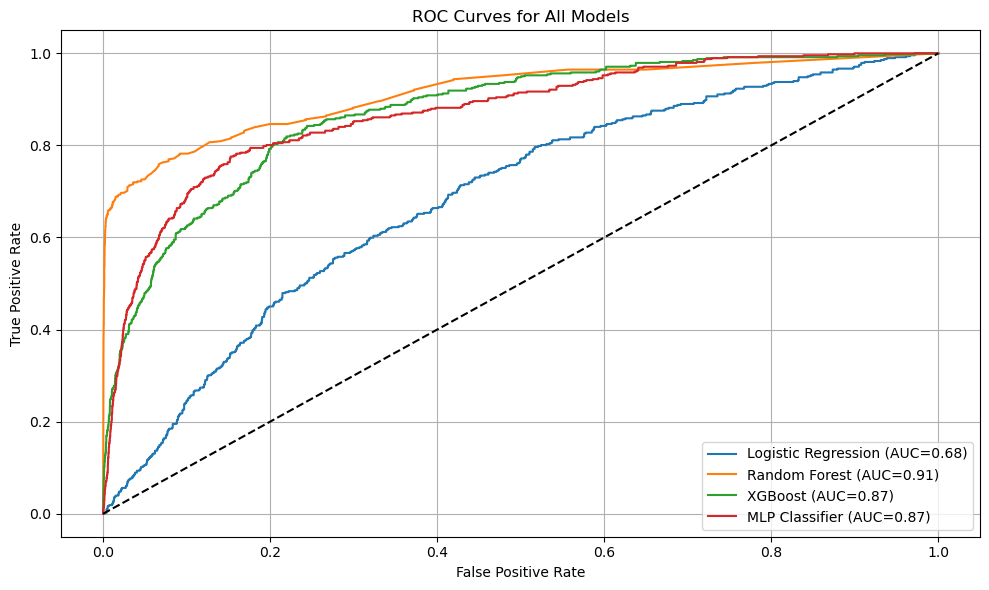

Best model: Random Forest
           Logistic Regression  Random Forest       XGBoost  MLP Classifier
precision             0.963557       0.982545      0.968966        0.970312
recall                0.587769       0.981986      0.841607        0.901228
f1-score              0.718425       0.982250      0.894238        0.929963
support           19540.000000   19540.000000  19540.000000    19540.000000

ROC AUC Scores:
Logistic Regression: 0.6847
Random Forest: 0.9140
XGBoost: 0.8715
MLP Classifier: 0.8711


['best_model.pkl']

In [16]:
# Step 1: Select most impactful features
selected_features = [
    "danceability", "energy", "valence", 
    "speechiness", "acousticness", "tempo", "duration"
]

X = sdata_clean[selected_features]  # Replace with your cleaned DataFrame
y = sdata_clean['popularity_label']           # Binary target (0 or 1)

# Step 2: Standardize all features
scaler = StandardScaler()
X_scaled_raw = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

# Step 3: Train/test split BEFORE SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_raw, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Apply SMOTE-Tomek on training set only
smt = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smt.fit_resample(X_train, y_train)

# Step 5: Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'MLP Classifier': MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=10,
        random_state=42,
        verbose=False
    )
}

results = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results[name] = {
        'Classification Report': classification_report(y_test, y_pred, output_dict=True, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'Model': model
    }
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Save best model
best_model_name = max(results, key=lambda name: results[name]['ROC AUC'])
best_model = results[best_model_name]['Model']
print(f"Best model: {best_model_name}")
print(pd.DataFrame({k: v['Classification Report']['weighted avg'] for k, v in results.items()}))
print("\nROC AUC Scores:")
for k, v in results.items():
    print(f"{k}: {v['ROC AUC']:.4f}")

joblib.dump(best_model, 'best_model.pkl')



In [19]:
# Force save MLP regardless of best AUC
joblib.dump(models['MLP Classifier'], 'best_model.pkl')


['best_model.pkl']